In [11]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True)

In [12]:
df

,ID,age,class,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,sex,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL,city_country,UPN
1,MHH2,24.00000,AML,85.0,56.00000,183.0,32.0,18.20,436.0,1.27,311.0,2.55,Female,6.978022,0.374188,0.585135,0.040678,bochum,NaN
2,MHH3,30.00000,ALL,83.0,70.00000,2018.0,33.0,59.00,NaN,0.00,51.0,2.95,Male,0.000000,0.600515,0.375619,0.023866,bochum,NaN
3,MHH4,40.00000,AML,108.0,116.00000,173.0,35.0,1.00,425.0,0.03,76.0,0.93,Female,3.000000,0.171153,0.817505,0.011342,bochum,NaN
4,MHH5,49.00000,AML,91.0,62.70000,188.0,37.0,9.90,700.0,5.77,25.0,1.88,Male,58.282828,0.021195,0.959750,0.019054,bochum,NaN
5,MHH6,46.00000,AML,81.0,62.40000,1173.0,33.0,42.00,700.0,1.26,86.0,0.42,Female,3.000000,0.594299,0.347099,0.058601,bochum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,ICH-162,64.67077,AML,96.7,68.75000,726.0,32.8,66.25,646.0,NaN,23.0,NaN,Male,NaN,0.272298,0.613121,0.114581,milano,NaN
131,ICH-164,79.34839,AML,90.8,70.51282,302.0,33.5,53.72,511.0,16.50,110.0,34.20,Female,30.714818,0.026821,0.968902,0.004277,milano,NaN
132,ICH-166,72.00274,AML,107.4,82.70677,106.0,35.1,2.08,243.0,0.10,2.0,1.30,Male,4.807692,0.066396,0.926456,0.007148,milano,NaN
133,ICH-168,81.01574,AML,106.6,76.92308,133.0,33.5,2.03,550.0,0.20,52.0,1.70,Male,9.852217,0.039871,0.955119,0.005009,milano,NaN


In [13]:
import pandas as pd

# Assuming df is your DataFrame
# Define the cutoffs
cutoffs = {
    "ALL": 0.4528432,
    "AML": 0.5001304,
    "APL": 0.3770665
}

# Filter the DataFrame based on the cutoffs
filtered_df = df[
    (df['prediction.ALL'] >= cutoffs['ALL']) &
    (df['prediction.AML'] >= cutoffs['AML']) &
    (df['prediction.APL'] >= cutoffs['APL'])
]

# Display the filtered DataFrame
print(filtered_df)

Empty DataFrame
Columns: [ID, age, class, MCV_fL, PT_percent, LDH_UI_L, MCHC_g_L, WBC_G_L, Fibrinogen_g_L, Monocytes_G_L, Platelets_G_L, Lymphocytes_G_L, sex, Monocytes_percent, prediction.ALL, prediction.AML, prediction.APL, city_country, UPN]
Index: []


Columns in the dataset: Index(['ID', 'age', 'class', 'MCV_fL', 'PT_percent', 'LDH_UI_L', 'MCHC_g_L',
       'WBC_G_L', 'Fibrinogen_g_L', 'Monocytes_G_L', 'Platelets_G_L',
       'Lymphocytes_G_L', 'sex', 'Monocytes_percent', 'prediction.ALL',
       'prediction.AML', 'prediction.APL', 'city_country', 'UPN'],
      dtype='object')
Missing values in 'age': 0
Missing values in 'sex': 516


/tmp/ipykernel_293513/3447417925.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette="coolwarm")


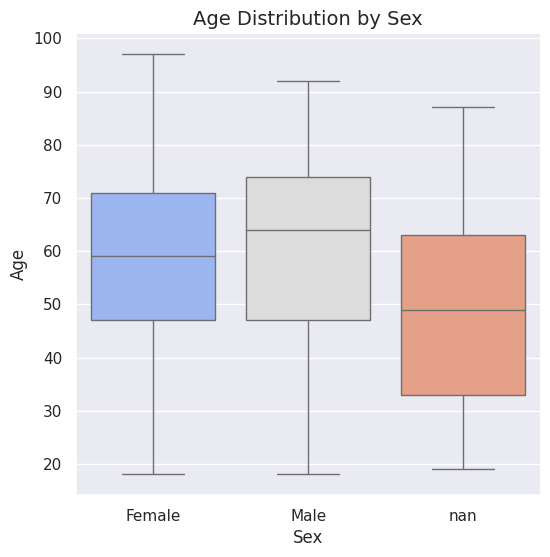

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check for duplicate columns
print("Columns in the dataset:", df.columns)

# Step 2: Drop duplicate columns if necessary
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Check for NaN or missing values in the 'age' and 'sex' columns
print("Missing values in 'age':", df['age'].isnull().sum())
print("Missing values in 'sex':", df['sex'].isnull().sum())

# Step 4: Ensure correct data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert 'age' to numeric, invalid parsing as NaN
df['sex'] = df['sex'].astype(str)  # Convert 'sex' to string

# Step 5: Drop rows with missing values in 'age' or 'sex' (if necessary)
df.dropna(subset=['age', 'sex'], inplace=True)

# Create the boxplot
plt.figure(figsize=(6, 6))
sns.set(style="darkgrid")

# Plotting the boxplot with 'sex' on x-axis and 'age' on y-axis
sns.boxplot(x='sex', y='age', data=df, palette="coolwarm")

# Adding title and labels
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.show()

In [3]:
df.sex.value_counts()

nan       516
Male      364
Female    321
Name: sex, dtype: int64

In [7]:
import pandas as pd 

df = pd.read_excel('/local/work/merengelke/aipal/suzhou/aipal/data.xlsx')

In [10]:
df

,ID,age,class,MCV_fL,PT percent,LDH_IU_L,MCHC_g_L,WBC G/L (x10^3 /µl),Fibrinogen_g/L,Monocytes G/L (x10^3 /µl),Platelets G/L (x10^3 /µl),Lymphocytes G/L (x10^3 /µl),sex
0,CH_1,28,APL,89.8,75.453379,217.0,361,2.52,1.138,0.28,102,0.69,Female
1,CH_2,54,APL,89.1,60.616977,458.2,326,30.34,1.600,0.12,22,28.25,Female
2,CH_3,18,APL,86.3,81.433553,181.0,348,0.85,1.773,0.13,10,0.46,Female
3,CH_4,36,APL,92.3,60.616977,457.0,339,9.12,1.260,4.58,15,1.64,Male
4,CH_5,56,APL,98.1,52.378548,277.9,423,4.70,1.060,2.68,25,1.12,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,CH_1344,55,ALL,88.9,75.453379,575.0,313,8.71,0.465,0.02,23,7.88,Male
1344,CH_1345,65,ALL,98.8,73.650590,312.3,325,112.68,5.370,2.25,125,63.10,Female
1345,CH_1346,59,MPAL,96.4,75.453379,284.6,340,1.56,4.950,0.08,149,1.00,Male
1346,CH_1347,47,MPAL,96.0,70.291765,108.0,335,1.59,6.680,0.03,36,1.28,Male


In [11]:
df.columns
# remove \n and spaces from column names
df.columns = df.columns.str.strip()
df

,ID,age,class,MCV_fL,PT percent,LDH_IU_L,MCHC_g_L,WBC G/L (x10^3 /µl),Fibrinogen_g/L,Monocytes G/L (x10^3 /µl),Platelets G/L (x10^3 /µl),Lymphocytes G/L (x10^3 /µl),sex
0,CH_1,28,APL,89.8,75.453379,217.0,361,2.52,1.138,0.28,102,0.69,Female
1,CH_2,54,APL,89.1,60.616977,458.2,326,30.34,1.600,0.12,22,28.25,Female
2,CH_3,18,APL,86.3,81.433553,181.0,348,0.85,1.773,0.13,10,0.46,Female
3,CH_4,36,APL,92.3,60.616977,457.0,339,9.12,1.260,4.58,15,1.64,Male
4,CH_5,56,APL,98.1,52.378548,277.9,423,4.70,1.060,2.68,25,1.12,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,CH_1344,55,ALL,88.9,75.453379,575.0,313,8.71,0.465,0.02,23,7.88,Male
1344,CH_1345,65,ALL,98.8,73.650590,312.3,325,112.68,5.370,2.25,125,63.10,Female
1345,CH_1346,59,MPAL,96.4,75.453379,284.6,340,1.56,4.950,0.08,149,1.00,Male
1346,CH_1347,47,MPAL,96.0,70.291765,108.0,335,1.59,6.680,0.03,36,1.28,Male


In [16]:
import pandas as pd

df = pd.read_excel('/local/work/merengelke/aipal/suzhou/aipal/data.xlsx')
df

,ID,age,class,MCV_fL,PT percent,LDH_IU_L,MCHC_g_L,WBC G/L (x10^3 /µl),Fibrinogen_g/L,Monocytes G/L (x10^3 /µl),Platelets G/L (x10^3 /µl),Lymphocytes G/L (x10^3 /µl),sex
0,CH_1,28,APL,89.8,75.453379,217.0,361,2.52,1.138,0.28,102,0.69,Female
1,CH_2,54,APL,89.1,60.616977,458.2,326,30.34,1.600,0.12,22,28.25,Female
2,CH_3,18,APL,86.3,81.433553,181.0,348,0.85,1.773,0.13,10,0.46,Female
3,CH_4,36,APL,92.3,60.616977,457.0,339,9.12,1.260,4.58,15,1.64,Male
4,CH_5,56,APL,98.1,52.378548,277.9,423,4.70,1.060,2.68,25,1.12,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,CH_1344,55,ALL,88.9,75.453379,575.0,313,8.71,0.465,0.02,23,7.88,Male
1344,CH_1345,65,ALL,98.8,73.650590,312.3,325,112.68,5.370,2.25,125,63.10,Female
1345,CH_1346,59,MPAL,96.4,75.453379,284.6,340,1.56,4.950,0.08,149,1.00,Male
1346,CH_1347,47,MPAL,96.0,70.291765,108.0,335,1.59,6.680,0.03,36,1.28,Male


In [15]:
df

,ID,age,class,MCV_fL,PT percent,LDH_IU_L,MCHC_g_L,WBC G/L (x10^3 /µl),Fibrinogen_g/L,Monocytes G/L (x10^3 /µl),Platelets G/L (x10^3 /µl),Lymphocytes G/L (x10^3 /µl),sex
0,CH_1,28,APL,89.8,75.453379,217.0,361,2.52,1.138,0.28,102,0.69,Female
1,CH_2,54,APL,89.1,60.616977,458.2,326,30.34,1.600,0.12,22,28.25,Female
2,CH_3,18,APL,86.3,81.433553,181.0,348,0.85,1.773,0.13,10,0.46,Female
3,CH_4,36,APL,92.3,60.616977,457.0,339,9.12,1.260,4.58,15,1.64,Male
4,CH_5,56,APL,98.1,52.378548,277.9,423,4.70,1.060,2.68,25,1.12,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,CH_1342,39,ALL,114.4,65.096742,196.0,320,0.91,2.160,0.01,196,0.70,Male
1342,CH_1343,37,AML,89.6,63.750620,1476.7,343,159.58,3.260,1.12,10,16.76,Male
1343,CH_1344,55,ALL,88.9,75.453379,575.0,313,8.71,0.465,0.02,23,7.88,Male
1344,CH_1345,65,ALL,98.8,73.650590,312.3,325,112.68,5.370,2.25,125,63.10,Female
